In [1]:
import matplotlib.colors as pltcolors
import matplotlib.pyplot as plt
import numpy as np

from svm import Kernel, SVM

In [2]:
def plot_line(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
    """ Plot a (separating) line given the normal vector (weights) and point of intercept """
    if type(x0) == int or type(x0) == float or type(x0) == np.float64:
        x0 = [0, -x0 / w[1]]
    yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
    ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)


def plot_svm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator',
             ax=None, bound=[[-1., 1.], [-1., 1.]]):
    """ Plot the SVM separation, and margin """
    if ax is None:
        fig, ax = plt.subplots(1)

    im = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.5, label=label)
    if support is not None:
        ax.scatter(support[:, 0], support[:, 1], label='Support', s=80, facecolors='none',
                   edgecolors='y', color='y')
        print("Number of support vectors = %d" % (len(support)))
    if w is not None:
        xx = np.array(bound[0])
        plot_line(ax, xx, w, intercept, separatorLabel)
        # Plot margin
        if support is not None:
            signedDist = np.matmul(support, w)
            margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
            supportMaxNeg = support[np.argmin(signedDist)]
            plot_line(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
            supportMaxPos = support[np.argmax(signedDist)]
            plot_line(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
            ax.set_title('Margin = %.3f' % (margin))

    ax.legend(loc='upper left')
    ax.grid()
    ax.set_xlim(bound[0])
    ax.set_ylim(bound[1])
    cb = plt.colorbar(im, ax=ax)
    loc = np.arange(-1, 1, 1)
    cb.set_ticks(loc)
    cb.set_ticklabels(['-1', '1'])


# Линейное ядро

In [3]:
def generate_batch_bipolar(n, mu=0.5, sigma=0.2):
    X = np.random.normal(mu, sigma, (n, 2))
    yB = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y = 2. * yB - 1
    X *= y[:, np.newaxis]
    X -= X.mean(axis=0)
    return X, y

Number of support vectors = 8


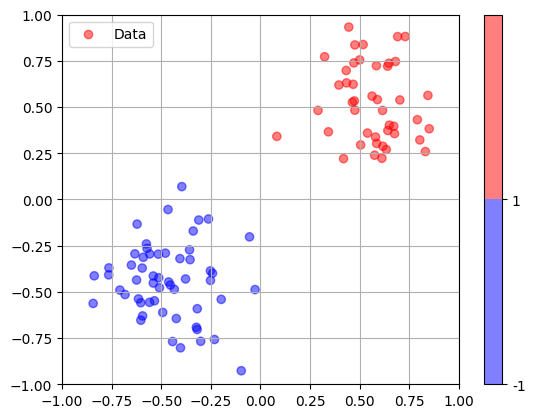

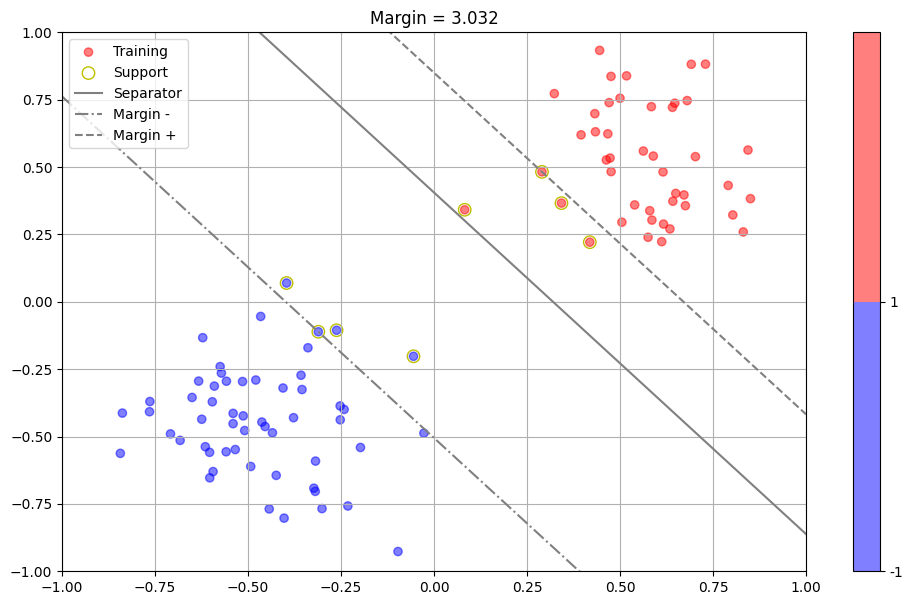

In [4]:
colors = ['blue', 'red']
cmap = pltcolors.ListedColormap(colors)
nFeatures = 2
N = 100

xTrain0, yTrain0 = generate_batch_bipolar(N, sigma=0.2)
plot_svm(xTrain0, yTrain0)

clf = SVM(C=1.0, kernel=Kernel.linear)
clf.fit(xTrain0, yTrain0)
fig, ax = plt.subplots(1, figsize=(12, 7))
plot_svm(xTrain0, yTrain0, clf.support_vectors, clf.w, clf.intercept, label='Training', ax=ax)

# RBF

In [5]:
def generate_batch_xor(n, mu=0.5, sigma=0.5):
    """ Four gaussian clouds in a Xor fashion """
    X = np.random.normal(mu, sigma, (n, 2))
    yB0 = np.random.uniform(0, 1, n) > 0.5
    yB1 = np.random.uniform(0, 1, n) > 0.5
    # y is in {-1, 1}
    y0 = 2. * yB0 - 1
    y1 = 2. * yB1 - 1
    X[:, 0] *= y0
    X[:, 1] *= y1
    X -= X.mean(axis=0)
    return X, y0 * y1

Number of support vectors = 38


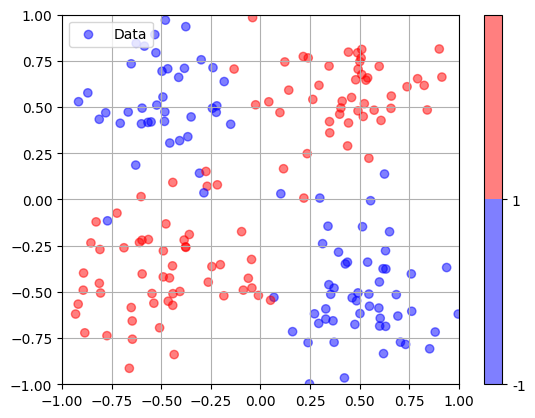

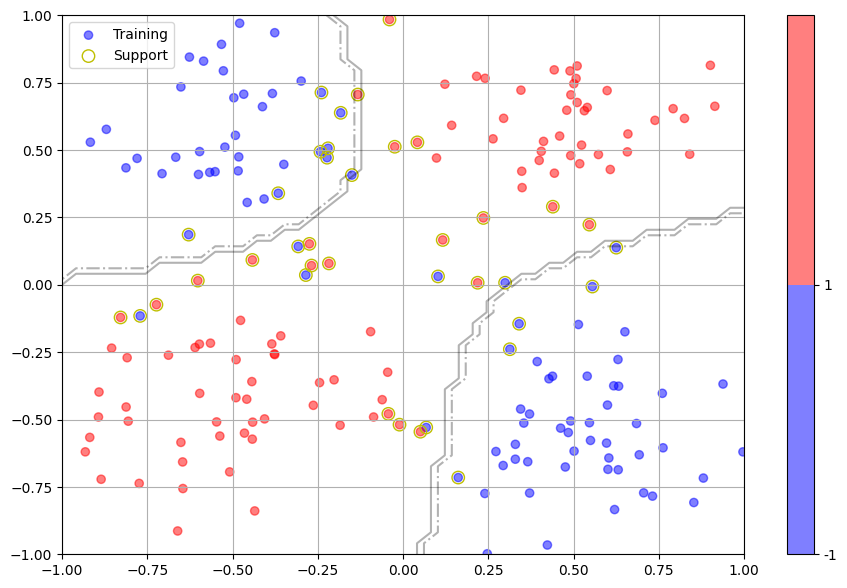

In [6]:
xTrain3, yTrain3 = generate_batch_xor(2 * N, sigma=0.25)
plot_svm(xTrain3, yTrain3)
xTest3, yTest3 = generate_batch_xor(2 * N, sigma=0.25)

model30 = SVM(C=5, kernel=Kernel.rbf)
model30.fit(xTrain3, yTrain3)

fig, ax = plt.subplots(1, figsize=(11, 7))
plot_svm(xTrain3, yTrain3, support=model30.support_vectors, label='Training', ax=ax)

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model30.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

Number of support vectors = 42


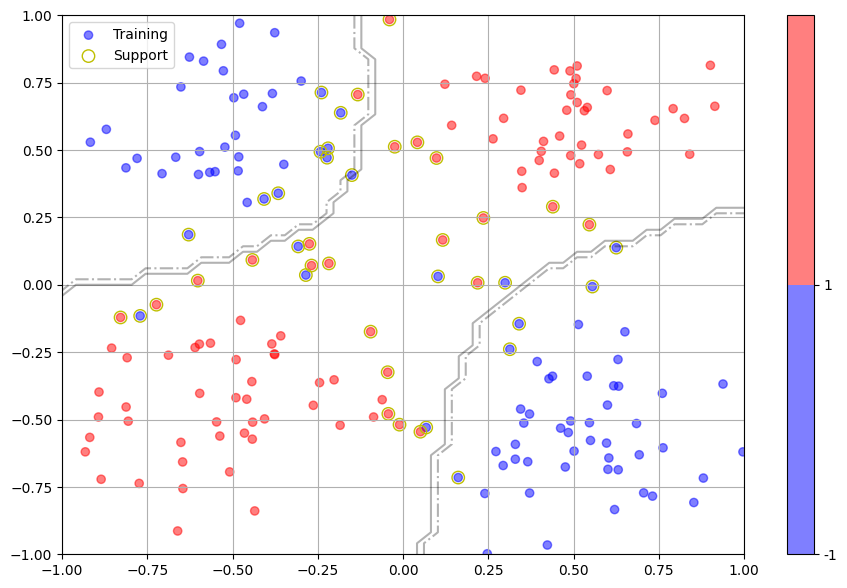

In [7]:
from sklearn import svm

model30 = svm.SVC(kernel='rbf', C=10, gamma=1/2, shrinking=False)
model30.fit(xTrain3, yTrain3)

fig, ax = plt.subplots(1, figsize=(11, 7))
plot_svm(xTrain3, yTrain3, support=model30.support_vectors_, label='Training', ax=ax)

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model30.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

# Полиномиальный

Number of support vectors = 31


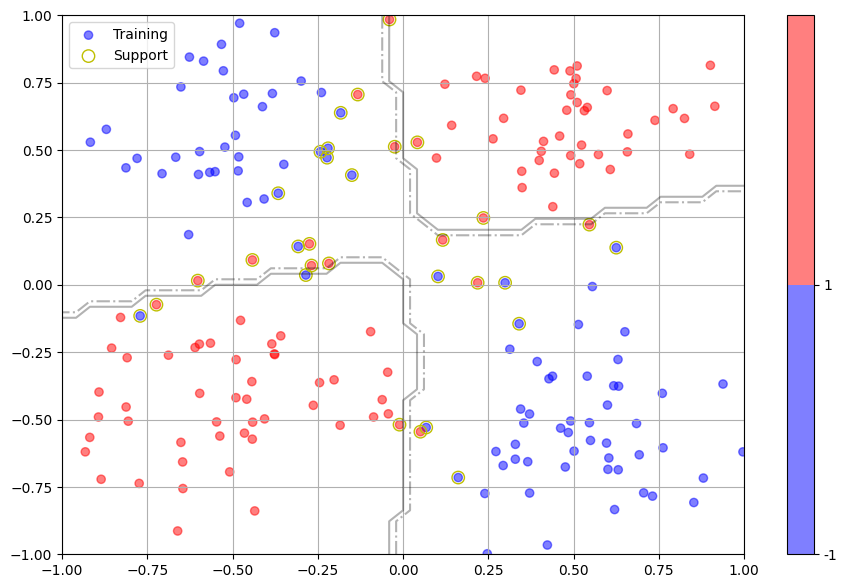

In [8]:
model30 = SVM(C=5, kernel=Kernel.poly)
model30.fit(xTrain3, yTrain3)

fig, ax = plt.subplots(1, figsize=(11, 7))
plot_svm(xTrain3, yTrain3, support=model30.support_vectors, label='Training', ax=ax)

# Estimate and plot decision boundary
xx = np.linspace(-1, 1, 50)
X0, X1 = np.meshgrid(xx, xx)
xy = np.vstack([X0.ravel(), X1.ravel()]).T
Y30 = model30.predict(xy).reshape(X0.shape)
ax.contour(X0, X1, Y30, colors='k', levels=[-1, 0], alpha=0.3, linestyles=['-.', '-']);

In [9]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/refs/heads/master/dataset.csv")
df["target"] = df["target"].replace({0: -1})
sc = MinMaxScaler()
columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal'
]
df[columns] = sc.fit_transform(df[columns])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1


In [10]:
from sklearn.model_selection import train_test_split


X = df.drop(["target"], axis=1).to_numpy()
y = df["target"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242, 1), (61, 13), (61, 1))

In [16]:
from sklearn.metrics import classification_report
from itertools import product


Cs = [0.1]
kernels = [Kernel.linear, Kernel.rbf, Kernel.poly]


for C, kernel in product(Cs, kernels):
    print(f'{C=}, kernel={kernel.__name__}')
    svm = SVM(C=C, kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('\n\n')


C=0.1, kernel=linear

              precision    recall  f1-score   support

          -1       0.80      0.77      0.78        26
           1       0.83      0.86      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

C=0.1, kernel=rbf

              precision    recall  f1-score   support

          -1       0.80      0.77      0.78        26
           1       0.83      0.86      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

C=0.1, kernel=poly

              precision    recall  f1-score   support

          -1       0.95      0.73      0.83        26
           1       0.83      0.97      0.89        35

    accuracy                           0.87        61
   macro avg       0.89      0.85      0.86        61
weighted avg

In [15]:
from sklearn.svm import SVC

C = 0.1

linear = SVC(kernel='linear', C=C)
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print(classification_report(y_test, y_pred))

rbf = SVC(kernel='rbf', C=C)
rbf.fit(X_train, y_train)
y_pred = rbf.predict(X_test)
print(classification_report(y_test, y_pred))

poly = SVC(kernel='poly', degree=3, C=C)
poly.fit(X_train, y_train)
y_pred = poly.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.74      0.85        31
           1       0.79      1.00      0.88        30

    accuracy                           0.87        61
   macro avg       0.89      0.87      0.87        61
weighted avg       0.90      0.87      0.87        61

              precision    recall  f1-score   support

          -1       1.00      0.68      0.81        31
           1       0.75      1.00      0.86        30

    accuracy                           0.84        61
   macro avg       0.88      0.84      0.83        61
weighted avg       0.88      0.84      0.83        61

              precision    recall  f1-score   support

          -1       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


/Users/wignorbo/PycharmProjects/itmo_ml_algorithms/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wignorbo/PycharmProjects/itmo_ml_algorithms/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wignorbo/PycharmProjects/itmo_ml_algorithms/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
